<div style="direction:rtl;line-height:300%;">
<font face="XB Zar" size=5>
<div align=center>
    <font size=3>
    باسمه تعالی
    </font>
    <br><br>
    <font>
محاسبات عددی
    <br>
        <font size=3>
            مدرس: دکتر فاطمه بهاری‌فرد
        </font>
    </font>
    <br><br>
    <font>
        <b>پروژه</b>
    </font>
    <br>
    <font size=3>
    موعد تحویل: 22 مرداد
    </font>
    <br>
    <font size=4>
    دستیاران آموزشی: 
        <a href="mailto:atoosachegini1379@gmail.com"> آتوسا چگینی</a>،
        <a href="mailto:alirezashateri7@gmail.com">علیرضا شاطری</a>
    </font>
    <br>
        <font size=2>
        دانشگاه صنعتی شریف
        <br>
        دانشکده مهندسی کامپیوتر
    </font>
</div>
</font>
</div>

<div style="direction:rtl;line-height:200%;">
<font face="XB Zar" size=3>
    <div align=center>
        <b>نام: محمدرضا دولتی</b>
        <br>
        <b>شماره‌ی دانشجویی: ۹۷۱۱۰۴۱۱</b>
        <br>
        <b>هم‌فکران: </b>
        <br>
        <b>منابع کمکی: </b>
    </div>
</font>
</div>

<div align= "justify" dir="rtl" markdown=1>
<font face="XB Nazanin" size=3 markdown=1>
    <h1>
    مقدمه
    </h1>
یکی از مهمترین مسائل حوزه‌ی محاسبات عددی، بهینه‌سازی می‌باشد. بهینه‌سازی انواع متعددی دارد. برای مثال پیدا کردن ریشه‌ی معادلات و کمینه کردن توابع دو نوع از معروفترین انواع بهینه‌سازی می‌باشند. در این درس با روش‌های مختلف حل این دو نوع آشنا شدید و تعدادی از آنها را نیز پیاده‌سازی کردید.حال پیش از پرداختن به محتوای پروژه نکات زیر را در نظر داشته باشید.
    <ul>
        <li>
انجام این پروژه به صورت انفرادی می‌باشد.
        </li>
        <li>
           زبان پروژه پایتون است.
        </li>
        <li>
        محدودیت‌هایی در رابطه با استفاده از کتاب‌خانه‌ها دارید که در ادامه ذکر می‌شوند.
        </li>
    </ul>
    در این پروژه قصد داریم گامی فراتر از مباحث درس بگذاریم و با روش‌های دیگر حل مسائل بهینه‌سازی و کاربرد هر یک آشنا شویم. 
  به طور کلی در این پروژه مسائل بهینه‌سازی را برای دو نوع مختلف از توابع یعنی توابع convex و non-convex بررسی می‌کنیم. پیدا کردن ریشه و کمینه یا بیشینه کردن این دو نوع توابع با هم تفاوت دارند که در ادامه با آن‌ها بیشتر آشنا می‌شویم.
  در صورت نیاز می‌توانید 
      <a href="https://www.solver.com/convex-optimization#:~:text=Convex%20Functions,-Geometrically%2C%20a%20function&text=A%20function%20is%20concave%20if,is%20neither%20convex%20nor%20concave.">
    این لینک
    </a>
    و 
      <a href="https://www.cs.cornell.edu/courses/cs6787/2017fa/Lecture7.pdf">
    این pdf
    </a>
    را مطالعه بفرمایید.
    </font>
</div>


  <div align= "justify" dir="rtl">
<font face="XB Zar" size=3>
    <h3>راه‌های مختلف بررسی convex بودن توابع
    </h3>
در صورت نیاز می‌توانید مفهوم convexity توابع را از 
    <a href="https://en.wikipedia.org/wiki/Convex_function">
    اینجا
    </a>
    بیشتر مطالعه کنید.
    برای بررسی convexity توابع به طور کلی دو راه وجود دارد.
        <ul>
        <li>
رسم نمودار تابع
        </li>
        <li>
           اجرای بهینه سازی convex با دو موقعیت شروع و بدست آوردن کمینه‌های مختلف
        </li>
    </ul>
    برای توابع زیر با استفاده از دو روش بالا convexity آنها را تشخیص دهید.
    </font>
</div>

1) $$sin(x) - x^2$$
2) $$sin(x) + cos(x)$$
3) $$x^4 + x^3 + x + 2$$
4) $$x^2 - x^4 + 2$$

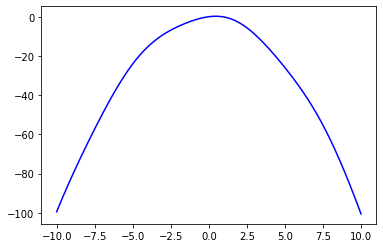

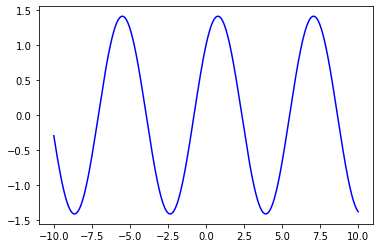

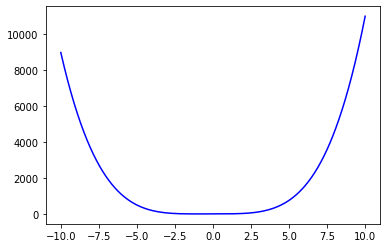

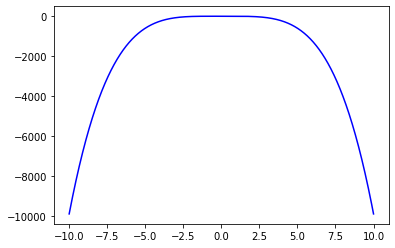

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy

def plot_(func, left, right):
    x_values = np.linspace(left, right, math.ceil(10 ** 4 * (right - left)))
    y_values = list(func(x) for x in x_values)
    plt.plot(x_values, y_values, 'b')
    plt.show()

# function 1 is ambigus

plot_(lambda t: np.sin(t) - t ** 2, -10, 10)

plot_(lambda t: np.sin(t) + np.cos(t), -10, 10)

plot_(lambda t: t ** 4 + t ** 3 + t + 2, -10, 10)

plot_(lambda t: t ** 2 - t ** 4 + 2,  -10, 10)


In [17]:
from scipy.optimize import minimize

def convexity(func):
    start_values = np.linspace(-10, 10, 100)
    min_point = None
    for x in start_values:
        res = minimize(func, x,
                       method='Nelder-Mead', tol=1e-16)

        if min_point is None:
            min_point = res.x
        elif -10 < res.x and np.abs(min_point - res.x) > 0.01:
            if min_point < -10:
                min_point = "minus infinity"
            elif min_point > 10:
                min_point = "infinity"
            if res.x < -10:
                r = "minus infinity"
            elif res.x > 10:
                r = "infinity"
            else:
                r = res.x

            print("There are two local minimums at {} and {}. So, function is"
                    " not convex".format(min_point, r))
            return
    print("We didn't find two local minimums. So, the function can be convex.")

print("Sin(x) - x^2")
convexity(lambda t: np.sin(t) - t ** 2)

print("\n", "Sin(x) + Cos(x)")
convexity(lambda t: np.sin(t) + np.cos(t))

print("\n", "x^4 + x^3 + x + 2")
convexity(lambda t: t ** 4 + t ** 3 + t + 2)

print("\n", "x^2 - x^4 + 2")
convexity(lambda t: t ** 2 - t ** 4 + 2)


Sin(x) - x^2
There are two local minimums at minus infinity and infinity. So, function is not convex

 Sin(x) + Cos(x)
There are two local minimums at [-8.6393798] and [-2.3561945]. So, function is not convex

 x^4 + x^3 + x + 2
We didn't find two local minimums. So, the function can be convex.

 x^2 - x^4 + 2
There are two local minimums at minus infinity and [8.8817842e-16]. So, function is not convex


<div align= "justify" dir="rtl">
<font face="XB Zar" size=3>
    <h3> نتایج
    </h3>
      <ul>
        <li>
کدام توابع محدب و کدام یک غیرمحدب هستند؟
 </li>
  <li>
هر یک از خروجی‌های تابع minimize به چه معنا هستند؟
 </li>
  <li>
در صورتی که تحلیل دیگری هم دارید می‌توانید در اینجا بنویسید.
 </li>
 </ul>
    <h4>پاسخ)
    </h4>
    </font>
</div>

<div dir="rtl">
تابع اول محدب نیست اما مقعر است. در تابع اول به علت تقعر تابع خروجی تابع مینیمایز در منفی بینهایت و بینهایت رخ داده است.

تابع دوم محدب نیست. از روی شکل تابع میتوان دید که متناوب است و بهینه های محلی زیادی دارد. خروجی تابع مینیمایز در این تابع به یکی از مینیممم های محلی تابع میل می کند.

تابع سوم در  نگاه اول محدب بنظر میرسد اما در بازه -۱ تا ۱ یه برآمدگی وجود دارد که باعث می‌شود محدب نباشد. با استفاده از روش دوم نمیتوانیم اثبات کنیم تابع محدب نیست زیرا این تابع تنها دارای یک کمینه محلی است و کمینه کلی تابع نیز هست. خروجی تابع مینیمایز به کمینه کلی این تابع میل می کند.

تابع چهارم نه محدب است و نه مقعر. در شکل تابع معلوم است که محدب نیست، همچنین ۳ بهینه محلی در نقاط منفی و مثبت بینهایت و ۰ وجود دارد. خروجی تابع مینیمایز یکی از کمینه های در بینهایت است یا کمینه محلی در نقطه ۰ است که بستگی به نقظه شروع الگوریتم دارد.

</div>

<div align= "justify" dir="rtl">
<font face="XB Zar" size=3>
    <h3> استفاده از روش‌های بهینه‌سازی برای توابع غیرمحدب
    </h3>
    در قسمت قبل تعدادی تابع به شما داده شد و با استفاده از دو روش محدب بودن یا نبودن آنها را بررسی کردید. در این قسمت باید با استفاده از روش <b>basin-hopping</b>
          <ul>
        <li>
  کمینه توابعی را که به عنوان توابع غیرمحدب دسته‌بندی کردید به دست آورید.
  </li>
  <li>
  از آنجایی که هیچ راهی وجود ندارد که basin-hopping متوجه پایان بهینه‌سازی شود، لازم است که تعداد مراحل اجرای الگوریتم را مشخص کنید. تاثیر این موضوع را در بهترشدن جواب بررسی کنید و بهترین تعداد مراحل اجرای الگوریتم را با استفاده از رسم نمودار پیدا کنید.
    </li>
  <li>
  مکان نقطه‌ی کمینه‌ی به دست آمده توسط این الگوریتم را روی نمودار تابع مشخص کنید. (به این ترتیب متوجه خواهید شد که الگوریتم شما چگونه عمل کرده است.)
    </li>
  </ul>
    </font>
</div>

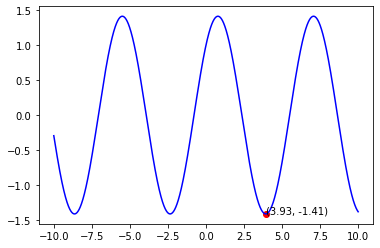

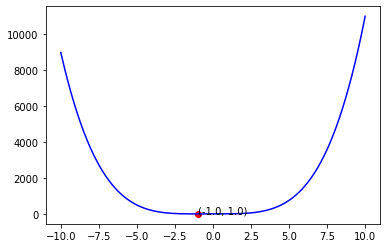

In [70]:
from scipy.optimize import basinhopping

def find_min_plot(func):
    ret = basinhopping(func, np.random.rand() * 20 - 10, niter = 1)
    x_values = np.linspace(-10, 10, 10**5)
    y_values = list(func(x) for x in x_values)
    plt.plot(x_values, y_values, 'b')
    plt.scatter(ret.x[0], ret.fun, c='r')
    plt.annotate("({}, {})".format(np.round(ret.x[0], 2)
                    , np.round(ret.fun, 2)),
                     (ret.x[0], ret.fun))
    plt.show()

find_min_plot(lambda t: np.sin(t) + np.cos(t))

find_min_plot(lambda t: t ** 4 + t ** 3 + t + 2)

<div dir="rtl">
دو تابع دیگر چون به منفی بینهایت میل میکردند مینیمم آنها منفی بینهایت بدست می‌آمد و کشیدن شکل برای آنها جالب ننمیشد. به همین منظور تنها توضیح دادم که بهینه در منفی بینهایت یا مثبت بینهایت بر اساس نقطه شروع پیدا میشد.

</div>


<div dir="rtl">
مشاهده می‌کنیم که الگوریتم در اولین ایتریشن به جواب میل می کند و از آن به بعد هم ثابت مانده است. پس در این دو تابع خاص داده شده تعداد بیشتر ایتریشن هیچ تاثیری ندارد.
</div>

<div align= "justify" dir="rtl">
<font face="XB Zar" size=3>
دیدیم که با استفاده از روش basin-hopping می‌توان توابع غیرمحدب را بهینه کرد در این بخش از شما می‌خواهیم در رابطه با چگونگی عملکرد این الگوریتم تحقیق کرده و به صورت خلاصه و گویا آن را توضیح دهید.
    </font>
</div>

<div dir="rtl">
این الگوریتم یک الگوریتم احتمالی مبتنی بر تکرار یک روند که این روند را شرح می دهیم. در هر مرحله از الگوریتم در ابتدا در هر جهت یک تغییر احتمالی در مقادیر رخ میدهد که به آن mutation می گوییم. سپس با یک الگوریتم دیگر به یک بهینه محلی میل می کنیم و در انتها با استفاده از مقدار آبجکتیو در نقطه جدید(اگر کم شده بود) انتخاب میکنیم که این نقطه را قبول کنیم یا خیر. این روند هی تکرار میشود اما روشی برای فهمیدن اینکه به جواب میل کرده ایم یا خیر وجود ندارد.


</div>

<div align= "justify" dir="rtl">
<font face="XB Zar" size=3>
    <h3> بهینه‌سازی کراندار
    </h3>
    بعضی اوقات می‌خواهیم دامنه تابع هدف را محدود کنیم. این کار به روشی متفاوت با پیدا کردن ریشه و کمینه کردن انجام می‌شود. همچنین هیچ متد خوبی برای یافتن ریشه‌ی کراندار در فضای 
    n
     بعدی 
     در 
     scipy
      پیاده‌سازی نشده است.
    </font>
</div>

<div align= "justify" dir="rtl">
<font face="XB Zar" size=3>
    <h3> ریشه‌یابی کراندار یک بعدی
    </h3>
   با استفاده از متد brent
     برای معادله زیر پاسخ را در بازه ی 0 و 1 بیابید:

$$x^2 - x^4 + 2$$
    </font>
</div>

In [20]:
from scipy.optimize import brentq

ret = brentq(lambda t: t ** 2 - t ** 4 + 2, 0, 2)

print("Root:", ret)
print("Objective:", ret ** 2 - ret ** 4 + 2)

Root: 1.4142135623730945
Objective: 5.10702591327572e-15


<div align= "justify" dir="rtl">
<font face="XB Zar" size=3>
در اینجا به طور خلاصه شیوه کار متد 
Brent
 راتوضیح دهید.
    </font>
</div>

<div dir="rtl">
این متد در ابتدای کار یک بازه دریافت می کند که نقطه ابتدا و انتهای آن در تابع علامت متفاوتی دارند. سپس در هر مرحله سعی می کند تا طول بازه را کاهش دهد. در این قسمت از ۳ روش متفاوت بهره میگیرد و در بین آنها بهترین حالت را انتخاب می کند. به اینصورت که یک نقطه در میان بازه در نظر میگیرد و با توجه به علامت آن انتخاب میکند بازه را به قسمت چپ یا راست آن کاهش دهد  که علامت دوطرف متفاوت باشد . در این روش یکی از نقاط وسط بازه، یکی از
inverse quadratic interpolation و دیگری با استفاده از
secant method
بدست می‌آید.


</div>

<div align= "justify" dir="rtl">
<font face="XB Zar" size=3>
معادله زیر را در نظر بگیرید که جواب آن طبق شرط گذاشته شده، حتما باید مثبت و بین صفر و یک باشد.

یک بار آن را به کمک تابع 
root
 و یک بار دیگر هم به کمک همان متد 
 brent
  معادله را حل کنید و جواب‌های دو متد را با هم مقایسه کنید. 
    </font>
</div>

In [21]:
def obj_function(x, k=32.5):
  return x ** 2 / (1 - x) - k

sol = scipy.optimize.root(obj_function, 10)

print("Result using root method:", sol.x[0], ", objective:",
      obj_function(sol.x[0]))

sol = brentq(obj_function, 100, 0.9999)
sol2 = brentq(obj_function, 100, -100)

print("Results using brentq method:", sol, sol2)

Result using root method: -33.470990099294525 , objective: 7.105427357601002e-15
Results using brentq method: 0.9999999999989845 -33.47099009929452


<div dir="rtl">
با مشاهده جواب این دو متد در میابیم که با استفاده از متد root به جوابهای متفاوتی میرسیم که امکان دارد دقت مناسبی نیز نداشته باشند. اما با تغییر بازه برای متد brentq میتوانیم ریشه های متفاوتی را بدست بیاوریم که از دقت های قابل قبولی برخوردارند اما بازهم در بعضی حالات جوابهای کمی دور از ریشه میدهند.

</div>



<div align= "justify" dir="rtl">
<font face="XB Zar" size=3>
    <h3> کمینه‌سازی کراندار یک بعدی
    </h3>
    تابع
    sin
     را در بازه 
     [π, π-]
      در نظر بگیرید.
    </font>
</div>

<div align= "justify" dir="rtl">
<font face="XB Zar" size=3>
    <h3> Sequential Least SQuares Programming (SLSQP)
    </h3>
    توضیحاتی مختصر در مورد این روش ارائه دهید سپس به کمک پیاده‌سازی این الگوریتم بهینه‌سازی در 
    scipy
     تابع گفته شده در بالا را کمینه‌سازی کنید.
    </font>
</div>

<div dir="rtl">
این هم مانند روش های قبلی یک روش ایتریتیو است که از روش ضریب لاگرانط و ضرایب آن در هر مرحله کمک میگیرد تا بهترین جهت برای آپدیت x را پیدا کند. برای پیدا کردن جهت بهینه از یک مسئله quadratic programming  کمک میگیرد که بوضوح شرط های آن شرط های اصلی مسئله است و آبجکتیو آن هم شامل یک عضو f(x) است که نماینده کمینه کردن f است، سپس شامل ضرب داخلی گرادیان تابع و جهت آپدیت است که نمایانگر حرکت در جهت گرادیان است و شامل یک عضو درجه دو شامل مشتق دوم لاگرانژین تابع است که بازهم برای حرکت در جهتی است که تابع لاگرانژین را کمینه تر کند. در هر مرحله این الگوریتم این مسئله حل می شود و x آپدیت می‌شود.


</div>

In [22]:
ret = scipy.optimize.minimize(lambda t: np.sin(t), 0,
                              bounds=[(-np.pi, np.pi)],
                              method="SLSQP")

ret

     fun: array([-1.])
     jac: array([-5.53205609e-05])
 message: 'Optimization terminated successfully'
    nfev: 7
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([-1.57085165])

<div align= "justify" dir="rtl">
<font face="XB Zar" size=3>
    <h3> کمینه‌سازی کراندار دو بعدی
    </h3>
    از همان تابع 
    scipy
     استفاده کرده و مقدار 
     sin(x)cos(y)
     را در بازه‌ی 
     [π, π-]
      کمینه کنید.
    </font>
</div>

In [23]:
ret = scipy.optimize.minimize(lambda t: np.sin(t[0]) * np.cos(t[1]), [0, 0],
                              bounds=[(-np.pi, np.pi)]*2,
                              method="SLSQP")

ret


     fun: -0.9999999984694352
     jac: array([-5.53205609e-05,  0.00000000e+00])
 message: 'Optimization terminated successfully'
    nfev: 10
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([-1.57085165e+00, -7.87184535e-09])

<div align= "justify" dir="rtl">
<font face="XB Zar" size=3>
    <h3> یک مثال کامل از کمینه‌سازی کراندار
    </h3>
    می‌دانیم انتروپی یک توزیع احتمالی گسسته با کمک فرمول زیر محاسبه می‌شود.


$S = -\sum_Qp_i\ln{p_i}$

طوری که جمع روی فضای نمونه‌ای است. انتروپی بیشینه را برای توزیع دو جمله‌ای با پارامتر p
 و 
 N = 5
  بدست آورید.

به عبارت دیگر، 
pای
 را بیابید که مقدار انتروپی را بیشینه کند.
    </font>

</div>



In [24]:
from scipy.special import comb
import numpy as np

def minus_entropy(p):
    prob = list(comb(5, i) * (p ** i) * ((1 - p) ** (5 - i)) for i in range(6))
    return sum(i * np.log(i) for i in prob)


ret = minimize(minus_entropy, np.random.rand(), bounds=[(0, 1)], method="SLSQP")

ret

     fun: array([-1.52367087])
     jac: array([5.73545694e-05])
 message: 'Optimization terminated successfully'
    nfev: 7
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([0.50001141])

<div align= "justify" dir="rtl">
<font face="XB Zar" size=3>
حال به ازای مقادیر مختلف 
p
 نمودار تابع 
 negative_entropy
  را به کمک 
  matplotlib
   نمایش دهید.
    </font>

</div>


<ipython-input-24-eb369ec8ba25>:6: RuntimeWarning: divide by zero encountered in log
  return sum(i * np.log(i) for i in prob)
<ipython-input-24-eb369ec8ba25>:6: RuntimeWarning: invalid value encountered in double_scalars
  return sum(i * np.log(i) for i in prob)


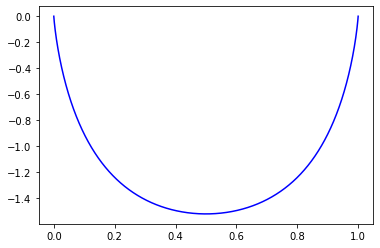

In [25]:
import matplotlib.pyplot as plt

plot_(minus_entropy, 0, 1)


<div align= "justify" dir="rtl">
<font face="XB Zar" size=3>
در نهایت به ازای 
pهای
 مختلف نمودار توزیع دوجمله‌ای مربوط به آن را رسم کنید. رسم نمودار برای حداقل ۲۰
  p 
  مختلف کافی‌ست.
    </font>

</div>

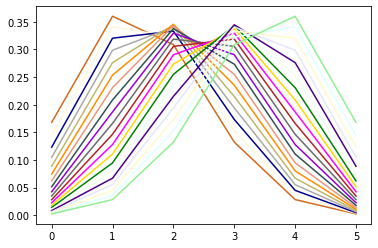

In [26]:
import matplotlib.cm as cm #import some colors

def plot_binomial(p, index):
    prob = list(comb(5, i) * (p ** i) * ((1 - p) ** (5 - i)) for i in range(6))
    plt.plot([0, 1, 2, 3, 4, 5], prob, list(cm.colors.cnames.values())[3 * index + 15])

p_values = np.linspace(0.3, 0.7, 20)

for i in range(20):
    plot_binomial(p_values[i], i)

plt.show()


<div align= "justify" dir="rtl">
<font face="XB Zar" size=3>
    <h3> کمینه‌سازی مقید
    (Constrained Minimization)
    </h3>
    قیدها در معادلات و بهینه‌سازی‌ها بسیار عمومی‌تر از کران‌ها هستند. ما می‌توانیم به هر تعداد دلخواهی قید قرار دهیم که یک جواب از معادله باید همه‌ی این قیود را رعایت کند.

حال می‌خواهیم در یک مثال شیوه حل معادله‌ی مقید را به کمک کد، بیاموزیم.

نزدیک ترین 
x, y
 به نقطه‌ی
  (6, 5)
 را بیابید به طوری که 
$x^2 + y^2 - 4 = 0$
 برقرار باشد.

</font>
</div>

</div>

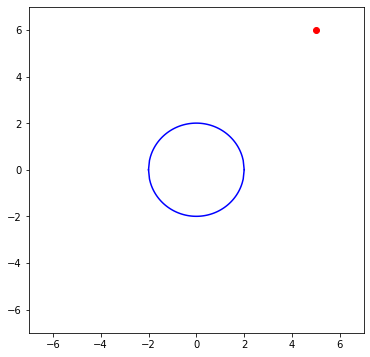

In [27]:
x = np.linspace(-2, 2, 100)

#make sure it's square
plt.figure(figsize=(6,6))

#have to plot the circle in two steps
plt.plot(x, np.sqrt(4 - x**2), color='blue')
plt.plot(x, -np.sqrt(4 - x**2), color='blue')

#now the point
plt.plot(5, 6, 'ro')

plt.xlim(-7, 7)
plt.ylim(-7, 7)

plt.show()

In [28]:

def dist(x1, x2):
  return np.sqrt((x1[0] - x2[0]) ** 2 + (x1[1] - x2[1]) ** 2)

In [29]:
# our constraint function(x is a 2d tuple)
def circle(x):
  return x[0] ** 2 + x[1] ** 2 - 4

# our objective function(x is a 2d tuple)
def objective(x):
  return dist(x, (5, 6))

my_constraints = {'type': 'eq', 'fun': circle}
result = minimize(objective, (0, 2),constraints=my_constraints, method="SLSQP")

result

     fun: 5.810249669332918
     jac: array([-0.64018267, -0.76822275])
 message: 'Optimization terminated successfully'
    nfev: 18
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([1.28037895, 1.53643411])

<div align= "justify" dir="rtl">
<font face="XB Zar" size=3>
حال نقطه‌ی بدست آمده را در نمودار رسم شده در بالا روی دایره، نشان دهید.

</font>
</div>

</div>

(-7.0, 7.0)

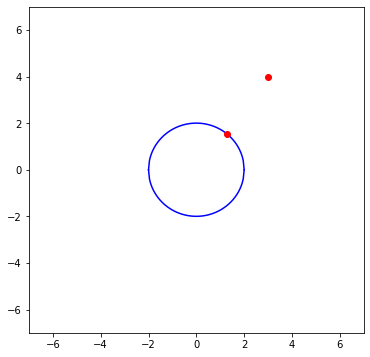

In [30]:
x = np.linspace(-2, 2, 100)

#make sure it's square
plt.figure(figsize=(6,6))

plt.plot(x, np.sqrt(4 - x**2), color='blue')
plt.plot(x, -np.sqrt(4 - x**2), color='blue')
plt.plot(3, 4, 'ro')

plt.plot(result.x[0], result.x[1], 'ro')

plt.xlim(-7, 7)
plt.ylim(-7, 7)